<div class="alert block alert-info alert">

# <center> Scientific Programming in Python

## <center>Karl N. Kirschner<br>Bonn-Rhein-Sieg University of Applied Sciences<br>Sankt Augustin, Germany

# <center> Testing Code

<!-- <br><br> -->

<hr style="border:2px solid gray"></hr>

**Note**: All user-defined functions in the notebook do not include document strings (i.e. block comments) or internal checks. This is purposely done to focus on the teaching aspects of the lecture. **A full and proper user-defined function would include these.**

<center>
<div> <img src="00_images/ai/unit_testing_gemini_generated.png" width="400"/> </div>
Generated with Gemini ∙ October 27, 2025 at 16:20
</center>

# Context: The Hidden Cost of Untested Code


**The "I Know It Works" Illusion**
- Testing code mentally or with a few temporary `print()` statements:
    - Works **today** and for this **one case**,
    - But tomorrow may be different: a colleague changes a dependency, or the code is refactored.
        - (That small, manual `print()` statement check is lost or bypassed.)

**Take-Home Message**
- Untested code is problematic:
    - Reduced confidence in it
    - Results in fear of making changes
    - Costly debugging

<br>

- Testing <b>flips</b> this dynamic
    - Gives you <b>confidence</b> to <b>refactor</b>, upgrade, and scale your code
        - If you break something, the tests will catch it
    - <b>Debugging</b> is <b>faster</b> and <b>easier</b>

---

# Unit Tests

- An <b>'automated'</b> procedure to verify a **small**, **isolated** code piece (i.e., a **unit**).
    - Make sure that the unit works as intended under different conditions.
 
## Unit Tests Characteristics

- <font color='DodgerBlue'>**Isolation**</font>
    - Focuses on the <b>smallest</b> testable <b>part</b> of the <b>code</b> (e.g., a single function).
    - It must be <b>run</b> in <b>isolation</b> (i.e., it doesn't rely on external factors like databases).

- <font color='DodgerBlue'>**Assertion / Raise Statements**</font>
    - Every unit test contains one or more <b>assertions/raise statements</b>.
        - An assertion is a conditional check (e.g., `assert calculated_value == expected_value`).
        - If it fails, the <b>test stops</b> and <b>reports an error</b>.

- <font color='DodgerBlue'>Automation</font>
    - The test is code itself.
    - It can be run instantly and repeatedly by a testing framework (e.g., <b>pytest</b>, unittest).
    - This is crucial for speed and consistency.

- <font color='DodgerBlue'>Speed</font>
    - Unit tests must execute very quickly (milliseconds).
        - They will be run constantly by developers (or automated build systems).

### Assert vs. Raise

- Comparing <font color='DodgerBlue'>two floats</font> to be within a <font color='DodgerBlue'>tolerance</font> range.

In [ ]:
tolerance = 0.001

calculated_number = 0.115
expected_number = 0.117

#### Standard `assert`: raises an AssertionError

Condition
- `abs(calculated_number - expected_number)` must be **less than** the `tolerance` value
- If `True`, then continue.
- If `False`, then **raise error**:

In [ ]:
abs(calculated_number - expected_number) <= tolerance

In [ ]:
assert abs(calculated_number - expected_number) <= tolerance, "Values are too far apart."

#### Custom `raise`: Checks the condition, explicitly raises an exception on failure

- `abs(calculated_number - expected_number)` is **greater than** the `tolerance` value
- If `True`, then **raise error**:
- If `False`, then continue.

In [ ]:
abs(calculated_number - expected_number) >= tolerance

In [ ]:
if abs(calculated_number - expected_number) >= tolerance:
    raise AssertionError(f"Error: Expected value was {expected_number:.3f}, but obtained {calculated_number:.3f}.")

## Example

In [ ]:
def calculate_grade(score, max_score=100):
    """ Calculates the percentage grade from a score. """

    percentage = (score / max_score) * 100

    return percentage

**Manual check**

In [ ]:
print(calculate_grade(80))

Look correct - great!

## Unit Test - Raising Errors

In [ ]:
def test_calculate_grade():
    """ Verifies the function's output for known, good data. """

    # 1. Standard case check (80/100 should be 80.0)
    assert calculate_grade(80) == 80.0, "The calculate_grade function does not work for when max_score is 100."

    # 2. Edge case check (max_score is not 100)
    assert calculate_grade(25, max_score=50) == 50.0, "The calculate_grade function does not work for when max_score is not 100."

    print("Test Passed.")

In [ ]:
test_calculate_grade()

We will add a `try`-`except` statement

In [ ]:
try:
    test_calculate_grade()
except AssertionError as error:
    print("TEST FAILED! The test caught a bug that the simple manual check missed.")
    print(f"Assert Failure Details: {error}")
    print("This is the power of a Unit Test: immediate feedback and regression prevention.")

### Scenario
Now, let's say in 10 months a colleague moves the 100 to a global position (i.e. outside the user-defined function).

In [ ]:
def calculate_grade(score, max_score=100):
    """ Buggy - calculates the percentage grade from a score. """

    # BUG: Forgot to multiply by 100
    percentage = (score / max_score) 

    return percentage

We will still use our `test_calculate_grade()` function, but now it will test the <b>new buggy</b> `calculate_grade()` function.

In [ ]:
test_calculate_grade()

Now we will introduce the `try-except` statement for code <b>error handling</b>:

In [ ]:
try:
    test_calculate_grade()
except AssertionError as error:
    print("TEST FAILED! The test caught a bug that the simple manual check missed.")
    print(f"Assert Failure Details: {error}")
    print("This is the power of a Unit Test: immediate feedback and regression prevention.")

---

## The `try`-`except` Statement - to Handle Errors
- Tells your code to try something, and
- then tells it what to do if it fails based on an <b>exception type</b>

 
#### Strengths:
1. The code will <font color='DodgerBlue'>**continue**</font> to run, even when it encounters a problem.

   - This prevents the program from crashing (e.g., if a test fails).<br><br>

2. <font color='DodgerBlue'>**Faster** than if statements</font> for when <font color='DodgerBlue'>majority of the planned tasks are **expected** to be **successful**</font> (i.e., they don't encounter an exception)

<br><br>
**Simple Example**

In [ ]:
try:
    print(5/0)
except ZeroDivisionError:
    print(f"Error: You can't have a zero in the denominator.")

**A More Sophisticated Example**

Let's set up a <font color='DodgerBlue'>division calculator</font> that allows users to input numbers and quit at any time using while and if loops (to demonstrate via a comparison of code).

1. First, set something up without `try`-`except` in order to see its advantage later.
2. Second, do the same thing with `try`-`except`

<font color='DodgerBlue'>Demonstrate the following</font>:
1. normal operation
2. exiting by typing 'q'
3. <font color='Red'>O</font> (i.e., a capital alphabet letter "O", as in "O"ktoberfest (also demonstrates traceback error))

Without `try`-`except` statement:

In [ ]:
## print('Type two numbers that you want to be divided.')
print("Type 'q' to quit.")
print()

while True:
    numerator = input('Numerator = ')
    if numerator == 'q':
        break

    denominator = input('Denominator = ')
    if denominator == 'q':
        break

    if denominator == '0':
        print("You can't have a zero in the denominator.")
        break

    answer = float(numerator)/float(denominator)
    print(f'Answer for {numerator}/{denominator} = {answer}\n')

Modify the above code to use a **`try`-`except` statement**, and try it with <font color='Red'>O</font>.

**Note**: <font color='DodgerBlue'>Multiple `except` conditions via a **tuple**</font>:<br>
`except (ZeroDivisionError, ValueError):`
- `ZeroDivisionError` when the denominator is zero
- `ValueError` for when a string is given as an input

In [ ]:
print('Type two numbers that you want to be divided.')
print("Type 'q' to quit.")
print()

while True:
    numerator = input('Numerator = ')
    if numerator == 'q':
        break

    denominator = input('Denominator = ')
    if denominator == 'q':
        break

    try:
        answer = float(numerator)/float(denominator)
        print(f'Answer for {numerator}/{denominator} = {answer}\n')

    except (ZeroDivisionError, ValueError):
        print('Your input was either not a number, or you are dividing by a zero.')

<font color='DodgerBlue'>Now the code continues to run, even though an error was raised!</font>

### Warning - Be Careful when Using `try-except` Statements
- They will mask or ignore potential bugs

<b>Scenario</b>: Creating a dungeon crawler game

#### Bad Practice: Demonstrates Error Hiding and False Success

In [ ]:
players = {1: None, 2: None, 3: None, 4: None, 5: None}
equipment_list = ['ax', 'potion', 'wand', 'dust', 'sword']

index = 0

while index <= 5:
    index += 1
    try:
        players[index + 1] = equipment_list[index] 
    except IndexError:
        break  # Stop the loop, hiding the fact that not all players were assigned.

# The data is corrupt/incomplete, but the program claims success.
print("Program finished execution.")
print("Success: Program finished execution with all players assigned.")

In [ ]:
print(f"Player data (corrupt):\n{players}")

<b>Notice</b>: <b>Player 1</b> has <b>no</b> equipment assigned.

<br>

#### Better Practice: Allows logical errors to stop the algorithm.

- Allow the program to error, thus notifying the programmer:

In [ ]:
players = {1: None, 2: None, 3: None, 4: None, 5: None}
equipment_list = ['ax', 'potion', 'wand', 'dust', 'sword']

index = 0

while index <= 5:
    # Logical Bug: index will reach 5, which is out of range for equipment_list.
    # The assignment below will fail when index = 5.
    index += 1
    players[index + 1] = equipment_list[index] 
    
print("Program finished execution.")
print("Success: Program finished execution with all players assigned.")

<br>

#### Best Solution: correct, clear, and robust

To show how the problem could be coded well:

In [ ]:
players = {1: None, 2: None, 3: None, 4: None, 5: None}
equipment_list = ['ax', 'potion', 'wand', 'dust', 'sword']

for index in range(len(equipment_list)): # Correctly iterates from 0 to 4
    players[index + 1] = equipment_list[index] 

# Verification
if None in players.values():
    print("Problem: Program finished execution with UNASSIGNED players.")
else:
    print("Program finished execution.")
    print("Success: Program finished execution with all players assigned.")

In [ ]:
print(f"Player data (uncorrupted):\n{players}")

<hr style="border:2px solid gray"></hr>

<h1 align='center'>Test Driven Development
    
<h2 align='center'> a.k.a. Unit Tests

https://docs.python.org/3/library/unittest.html

## Test Driven Development - writing tests before you write your production code
1. Ensures proper and directed functionality of your code
 - creating **concise** code that does a **single** thing (e.g., user-defined functions)
2. Helps you plan your code - what do you **actually want** to do (critical thinking)
3. Reduces **errors**
4. Ensures **reproducibility**
5. Helps to ensure a code's **long life**

## The Workflow Concept
1. Write a failing test
2. Run and ensure failure
3. Write code to pass
4. Run and ensure passing
5. Refactor (i.e., restructure/clean up code without changing it final result)
6. Redo steps 1-5

## Scientific and Data Research
It is **CRITICAL** that:
1. you get the correct results
2. you make it generate reproducible results, especially as the code becomes bigger (and changes)

#### Assert statements that can be used in unittest library

https://docs.python.org/3/library/unittest.html#module-unittest


| Method | Checks that | New in |
|:------|:-:|:-:|
| assertEqual(a, b) | a == b | |
| assertNotEqual(a, b)| a != b | |
| assertTrue(x) | bool(x) is True | |
| assertFalse(x) | bool(x) is False | |
| assertIs(a, b) | a is b | 3.1 |
| assertIsNot(a, b) | a is not b | 3.1 |
| assertIsNone(x) | x is None | 3.1 |
| assertIsNotNone(x) | x is not None | 3.1 |
| assertIn(a, b) | a in b | 3.1 |
| assertNotIn(a, b) | a not in b | 3.1 |
| assertIsInstance(a, b) | isinstance(a, b) | 3.2 |
| assertNotIsInstance(a, b) | not isinstance(a, b) | 3.2 |
| | | |
| | | |
| assertAlmostEqual(a, b) | round(a-b, 7) == 0 | |
| assertNotAlmostEqual(a, b) | round(a-b, 7) != 0 | |
| assertGreater(a, b) | a > b | 3.1 |
| assertGreaterEqual(a, b) | a >= b | 3.1 |
| assertLess(a, b) | a < b | 3.1 |
| assertLessEqual(a, b) | a <= b | 3.1 |
| assertRegex(s, r) | r.search(s) | 3.1 |
| assertNotRegex(s, r) | not r.search(s) | 3.2 |
| assertCountEqual(a, b) | a and b have the same elements in the same number, regardless of their order. | 3.2 |


| Method | Used to compare | New in|
|:------|:-:|:-:|
| assertMultiLineEqual(a, b) | strings | 3.1 |
| assertSequenceEqual(a, b) | sequences | 3.1 |
| assertListEqual(a, b) | lists | 3.1 |
| assertTupleEqual(a, b) | tuples | 3.1 |
| assertSetEqual(a, b) | sets or frozensets | 3.1 |
| assertDictEqual(a, b) | dicts | 3.1 |

Demonstrate the following two scenarios:
1. Scenario 1: the unit test runs with everything correct
2. Scenario 2: the unit test runs, but with errors
     - A new `assertEqual` is added

**Note**: We will include <font color='DodgerBlue'>additional assert statements just to demonstrate how the output of a unit test looks like</font>, even though it is not relevant to our user-defined function.

**Scenario 1**: the unit test runs with everything <font color='DodgerBlue'>correctly</font>

Define a user-defined function to demo how that is done:

In [ ]:
def hello_world():
    return 'hello world'

**Note**: `isupper()`

- `str.isupper()`: Return `True` if all characters in a given string are uppercase, otherwise it is `False`.
    
    - https://docs.python.org/3/library/stdtypes.html

In [ ]:
import unittest


class MyFirstUniTTests(unittest.TestCase):

    def test_isEqual(self):
        self.assertEqual(hello_world(), 'hello world')

    def test_isLess(self):
        self.assertLess(5, 10)

    def test_isLessEqual(self):
        self.assertLessEqual(10, 10)

    def test_isUpperTrue(self):
        self.assertTrue('FOO'.isupper())

    def test_isUpperFalse(self):
        self.assertFalse('Foo'.isupper())


## Normal usage (in a .py script)
#if __name__ == '__main__':
#    unittest.main()

## For usage in jupyter and colaboratory (due to the kernel)
if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

**Scenario 2**: the unit test runs, but some <font color='red'>errors</font> occur

In [ ]:
class MyFirstUniTTests(unittest.TestCase):

    def test_fail(self):
       self.assertEqual(hello_world(), 'bye world')

    def test_isEqual(self):
        self.assertEqual(hello_world(), 'hello world')

    def test_isLess(self):
        self.assertLess(5, 10)

    def test_isLessEqual(self):
        self.assertLessEqual(10, 10)

    def test_isUpperTrue(self):
        self.assertTrue('FOO'.isupper())

    def test_isUpperFalse(self):
        self.assertFalse('Foo'.isupper())


if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

## PyTest (state-of-the-art)

1. A command-line (e.g., using a bash shell) driven testing approach
2. Simplifies and helps organize unit tests
    - done by creating **user-defined functions** for **each test** that you want to do

https://docs.pytest.org/en/7.1.x/contents.html#

In [ ]:
%%writefile test_sum.py
''' The following will be created:
        1. Four unit test functions
            a. First 3 will pass
            b. Last 1 will fail
'''

def test_pass_add_list_1():
    ''' 1st unit test
    '''
    test_list = [1, 2, 3, 4]
    assert sum(test_list) == 10


def test_pass_add_list_2():
    ''' 2nd unit test
    '''
    test_list = [1, 2, 3, 4, 5]
    assert sum(test_list) == 15


def test_pass_add_list_3():
    ''' 3rd unit test
    '''
    test_list = [1, 2, 3, 4, 5, 6]
    assert sum(test_list) == 21


def test_fail_add_list_4():
    ''' 4th unit test
        Should Fail
    '''
    print('PRINT STATEMENT FOR FAILING TEST FUNCTION.')
    
    test_list = [1, 2, 3, 4, 5, 6]
    assert sum(test_list) == 0

PyTest will give the following output:
- `.` (dot) = test <font color='DodgerBlue'>passed</font>
- `F` =  test has <font color='DodgerBlue'>failed</font>
- `E` =  test raised an <font color='DodgerBlue'>unexpected exception</font>

In [ ]:
! pytest test_sum.py

**Output**
1. The first three test passed
2. The fourth test fails
3. A traceback is given concerning the error
4. None of the print statements are seen

<font color='DodgerBlue'>To see print commands</font> within the user-defined functions, <font color='DodgerBlue'>use `-s` option</font>:

(`-s` is a shortcut for `--capture=no` - see `pytest --help`)

In [ ]:
! pytest test_sum.py -s

Clean up directory:

In [ ]:
%rm test_sum.py

## Example of Notebook function and PyTesting

Create a User-defined Function

In [ ]:
def calculate_area(length, width):
    """ Calculate the area of a rectangle.
    """
    if length <= 0 or width <= 0:
        raise ValueError("Dimensions must be positive.")
    return length * width

Create PyTest

In [ ]:
%%writefile test_calculate_area.py
import pytest

def calculate_area(length, width):
    """ Calculate the area of a rectangle.
    """
    if length <= 0 or width <= 0:
        raise ValueError("Dimensions must be positive.")
    return length * width


def test_positive_dimensions():
    # Test case with standard positive inputs
    assert calculate_area(5, 4) == 20


def test_square_dimensions():
    # Test case for a square (equal sides)
    assert calculate_area(10, 10) == 100


def test_zero_or_negative_dimensions():
    # Test case for invalid input using pytest.raises
    with pytest.raises(ValueError):
        calculate_area(-1, 5)
    with pytest.raises(ValueError):
        calculate_area(0, 5)

In [ ]:
! pytest test_calculate_area.py

In [ ]:
%rm test_calculate_area.py

## Introducing `pytest.mark.parametrize`

In [ ]:
%%writefile test_even.py
import pytest


def add(number_1: int|float, number_2: int|float) -> float:
    """
    Returns the sum of two numbers.

    Parameters:
        number_1: The first number.
        number_2: The second number.

    Returns:
        int or float: The sum of a and b.
    """
    return number_1 + number_2


def test_add_multiple_inputs():
    ''' An initial attempt that uses a for loop within the test (avoid this).
    '''
    test_data = [(1, 2, 3),
                 (-1, -1, -2),
                 (5, 0, 5)]
    for num_1, num_2, expected in test_data:
        assert add(number_1=num_1, number_2=num_2) == expected

In [ ]:
!pytest -vs test_even.py

In [ ]:
%%writefile test_add_numbers.py
import pytest


def add(number_1: int|float, number_2: int|float) -> float:
    """
    Returns the sum of two numbers.

    Parameters:
        number_1: The first number.
        number_2: The second number.

    Returns:
        int or float: The sum of a and b.
    """
    return number_1 + number_2


@pytest.mark.parametrize("num_1, num_2, expected", [(1, 2, 3),        # Test Case 1: Positive numbers
                                                    (-1, -1, -2),     # Test Case 2: Negative numbers
                                                    (5, 0, 5),        # Test Case 3: Testing with zero
                                                    (100, -50, 50)])  # Test Case 4: Positive and negative

def test_add(num_1, num_2, expected):
    assert add(number_1=num_1, number_2=num_2) == expected

In [ ]:
!pytest -vs test_add_numbers.py

In [ ]:
%rm test_add_numbers.py

---

## Unit Tests in the Age of AI

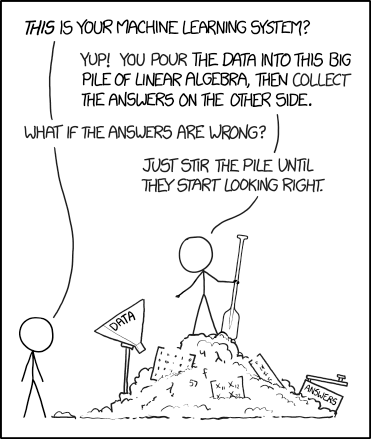

In [5]:
from IPython import display

display.Image("https://imgs.xkcd.com/comics/machine_learning.png")

<b>LLMs</b> are capable of generating <b>entire functions</b>, which means that
- Code is written <b>faster</b>, but
- <b>Not necessarily safer</b> or more <b>correct</b>.
    
<b>Unit tests</b> serve as the essential
- <b>safety net</b>
- <b>verification step</b>

<br>

### Unit Tests
1. Source of <b>Truth</b>

    - Verifying AI-Generated Code (via <b>LLMs</b>):
        - excellent at writing <b>syntactically correct</b> code,
        - can <b>miss edge cases</b>, or
        - <b>misinterpret</b> complex <b>domain logic</b>.
    - Unit tests
        - Deterministic <b>source of truth</b> that verifies an AI's output.
        - Guards <b>against "hallucinations"</b>.

2. Maintaining <b>Stability</b> During Rapid <b>Iterations</b>

    - Safety Net for Refactoring
        - AI tools <b>enable</b> rapid <b>refactoring / restructuring</b>
        - A <b>unit test suite</b> - allows <b>developers</b> to <b>confirm</b> AI-driven refactoring (preventing bugs).

    - Faster Debugging (Pinpointing the Error) of complex AI-generated code

3. The Core of Effective Prompt Engineering

    - Test-Driven Prompting
        - The <b>unit test</b> file itself <b>becomes a powerful prompt</b> you can give an <b>LLM</b>.
            - "Write Python code that makes this unit test pass" (vs. less precise/effective "Write a function to do X.")

    - Defining Edge Cases
        - Explicitly define expected behavior for all inputs (e.g., negative numbers, empty arrays, null values).
        - Results in more <b>robust AI code</b>.

4. Knowledge Transfer
    - Onboarding and Documentation - Unit tests are a form of living documentation
        - <b>New</b> developers running unit tests and <b>reading their inputs/assertions</b> is an efficient way to understand the intended <b>code's functionality</b> and <b>requirements</b>

---
# Take Home Messages

In <b>scientific research</b>, it's <b>very important</b> that code produces <b>correct</b> and <b>reproducible</b> results.

1. Importance of Testing and Untested Code
    - Untested code is problematic because it:
        - <b>Reduced confidence</b>
        - Causes <b>fear</b> of making <b>changes</b> (refactoring), and
        - Is <b>costly</b> debugging
    
    - Testing <b>flips</b> this dynamic.

    - "I Know It Works" illusion is dangerous
        - <b>Manual checks work temporarily</b> (e.g., print statement), but can change tomorrow (e.g., refactoring)
        - Can easily break functionality without detection

- <b>Unit Tests - Raising Errors</b>

    - A unit test: an 'automated' procedure to verify a small, <b>isolated code piece</b> (e.g., a function) works as intended under different conditions.

    - Unit Test's Key Characteristics:
        - <b>Isolation</b>: Focuses on the <b>smallest testable part of the code</b>, and must run without external dependencies (e.g., databases).
        - <b>Assertion / Raise Statements</b>: Every test contains these checks that <b>stop</b> and <b>report</b> an <b>error</b> if they fail.
        - <b>Automation</b>: The test runs without interventions, and can do so through a framework (e.g., pytest, unittest).
        - <b>Speed</b>: Executes very quickly since they are constantly rerun.

- <b>`try-except` - Error Handling</b>

    - `try-except` statement tells your code to
        - try a block of code, and
        - then specifies what to do if an exception (error) of a certain type occurs.

    - Strengths:
        - The <b>code continues to run</b> even after <b>encountering a problem</b>.
        - Faster than using if statements when the majority of tasks are expected to be successful.

    - Weakness:
         - They can <b>mask or ignore potential bugs</b>
             - Leading to corrupt or incomplete data while the program suggests otherwise (i.e., Error Hiding).
         - Better practice: <b>allow logical errors to stop the algorithm</b>, thus notifying the programmer.

- <b>Test-Driven Development</b> (TDD)

    - TDD involves writing tests before you write your production code.

    - Benefits:

        - Ensures proper and directed functionality - <b>leads to concise code</b> that does a single thing.

        - Helps <b>plan your code</b> and <b>encourages critical thinking</b> about what you actually want to do.

        - <b>Reduces errors, ensures reproducibility</b>, and helps ensure a code's long life (<b>maintainability, sustainability</b>).

    - TDD Workflow Concept
 
        - Write a failing test,
        - Run and ensure failure,
        - Write code to pass,
        - Run and ensure passing,
        - Refactor (restructure/clean up code without changing its final result), and
        - Redo

- <b>PyTest</b> Tool

    - PyTest is a command-line driven testing framework that <b>simplifies and organizes unit tests</b>
        - via <b>creating separate user-defined functions for each test</b>.

    - The output symbols help quickly assess test results
 
        - `.` for passed,
        - `F` for failed, and
        - `E` for an unexpected exception

- <b>Unit tests</b> are becoming <b>more important</b> in the age of <b>AI</b>